# Final assignment.

In [4]:
!pip install pandas
!pip install numpy
!pip install js
!pip install scipy
!pip install seaborn
!pip install matplotlib
!pip install statsmodels
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for js: filename=js-1.0-py3-none-any.whl size=2966 sha256=132c3381a64900ed1466b94c877e9d7b2358a205d83f8912746e66ebb9aa5fa0
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\6f\91\12\9fc79cc62b07127faf39b5f3afcc6606e659bb54743a00bebb
Successfully built js

   ---------------------------------------- 0/3 [WebOb]
   ---------------------------------------- 0/3 [WebOb]
   ------------- -------------------------- 1/3 [fanstatic]
   ------------- -------------------------- 1/3 [fanstatic]
   -------------------------- ------------- 2/3 [js]
   ---------------------------------------- 3

In [6]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

In [7]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
print(boston_df)

     Unnamed: 0      CRIM     ZN  INDUS  CHAS     NOX     RM    AGE      DIS  \
0             0   0.00632   18.0   2.31   0.0  0.5380  6.575   65.2   4.0900   
1             1   0.02731    0.0   7.07   0.0  0.4690  6.421   78.9   4.9671   
2             2   0.02729    0.0   7.07   0.0  0.4690  7.185   61.1   4.9671   
3             3   0.03237    0.0   2.18   0.0  0.4580  6.998   45.8   6.0622   
4             4   0.06905    0.0   2.18   0.0  0.4580  7.147   54.2   6.0622   
5             5   0.02985    0.0   2.18   0.0  0.4580  6.430   58.7   6.0622   
6             6   0.08829   12.5   7.87   0.0  0.5240  6.012   66.6   5.5605   
7             7   0.14455   12.5   7.87   0.0  0.5240  6.172   96.1   5.9505   
8             8   0.21124   12.5   7.87   0.0  0.5240  5.631  100.0   6.0821   
9             9   0.17004   12.5   7.87   0.0  0.5240  6.004   85.9   6.5921   
10           10   0.22489   12.5   7.87   0.0  0.5240  6.377   94.3   6.3467   
11           11   0.11747   12.5   7.87 

## A boxplot displaying the Median value of owner-occupied homes in $1000's.

Text(0.5, 1.0, 'Owner-occupied homes')

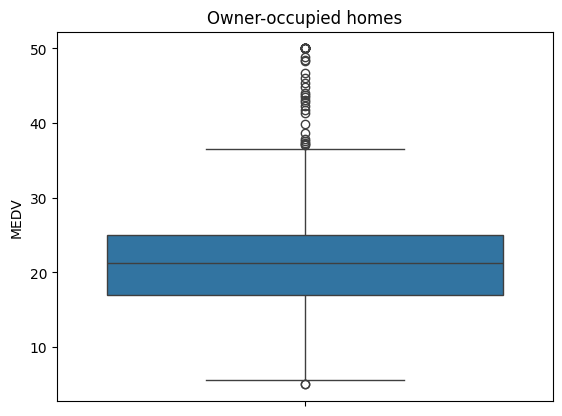

In [8]:
ax=box_plot = sns.boxplot(y='MEDV', data=boston_df)
ax.set_title('Owner-occupied homes')

## a count plot for Number of homes that bound the Charles River(1 if tract bounds river; 0 otherwise)

Text(0.5, 1.0, 'Number of homes near the Charles River')

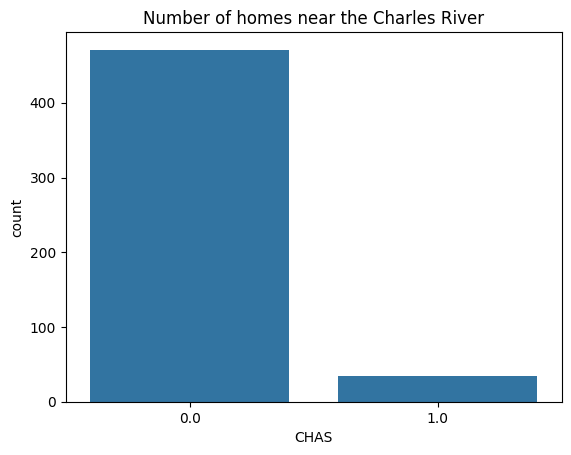

In [ ]:
ax2=sns.countplot(x='CHAS', data=boston_df)
ax2.set_title('Number of homes near the Charles River')


## a boxplot for different Median value of owner-occupied homes per Age Group.

In [10]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'

Text(0.5, 1.0, 'Median value of owner-occupied homes per Age Group')

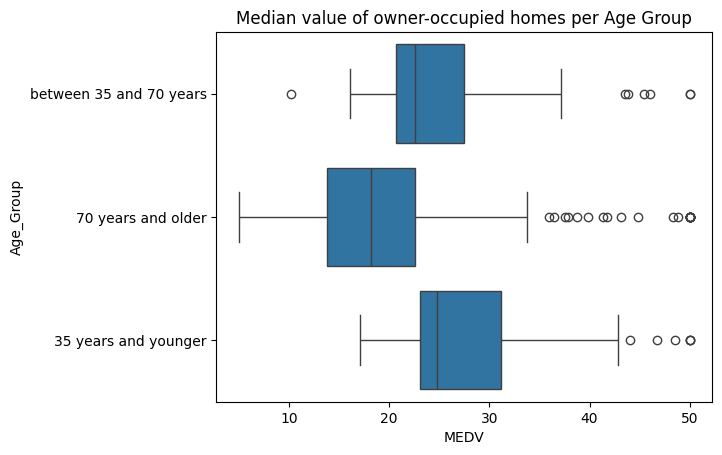

In [11]:
ax3 = sns.boxplot(x = 'MEDV', y = 'Age_Group', data = boston_df)
ax3.set_title('Median value of owner-occupied homes per Age Group')

## scatter plot of Nitric oxide concentration per proportion of non-retail business acres per tow.

Text(0.5, 1.0, 'Nitric oxide concentration per proportion of non-retail business acres per town')

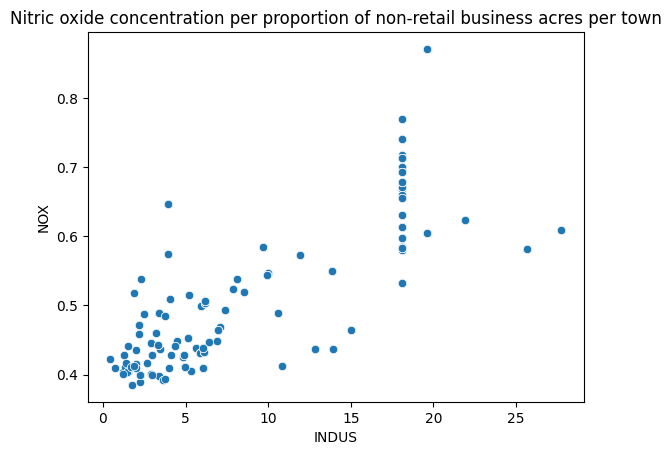

In [12]:
ax4=sns.scatterplot(y='NOX',x='INDUS',data=boston_df)
ax4.set_title('Nitric oxide concentration per proportion of non-retail business acres per town')

The graph indicates that a lower denity of buisnesses leads to lower concentrations of nitric oxide and vice versa.

Text(0.5, 1.0, 'Pupil to teacher ratio per town')

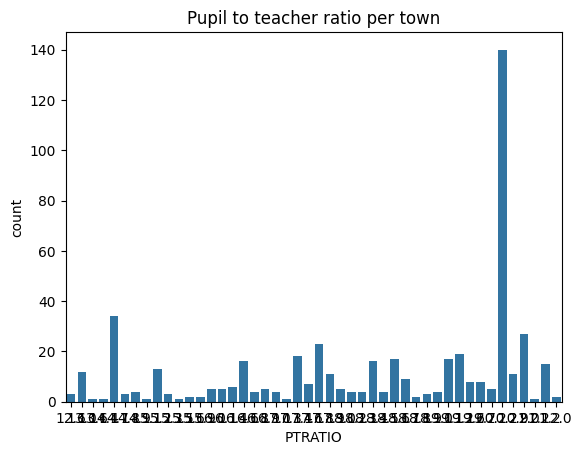

In [13]:
ax5=sns.countplot(x='PTRATIO', data=boston_df)
ax5.set_title('Pupil to teacher ratio per town')

## Hypothesis: µ_1 = µ_2

## Alternative hypothesis: µ_1 =/= µ_2

In [14]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Given the p-value is less than 0.05, we reject the Null Hypothesis, meaning there is not a statistical difference in median value betwenn houses near the Charles River and houses far away.

## Hypothesis:

µ_1 = µ_2 is no statistical difference in Median values of houses for each proportion of owner occpied units built prior to 1940

µ_1=/=µ_2 a statistical difference in Median values of houses for each proportion of owner occpied units built prior to 1940

In [15]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


Since the p-value is less than 0.05, we fail to accept the null Hypothesis,There is statistical difference in Median values of houses for each proportion of owner occpied units built prior to 1940.

## Can we conclude that there is no relationship between Nitric oxide concentrations
## and proportion of non-retail business acres per town? (Pearson Correlation)

µ_1 = µ_2 There is no statistical difference in nitrix oxide for proportion of non-retail business acres per town

µ_1=/=µ_2ve There is a statistical difference in nitrix oxide for proportion of non-retail business acres per town


In [16]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.91336106123623e-98)

Given the Pearson Coefficient is 0.76365 and p-value less than 0.05 we reject the Null Hypothesis as there is a positive correlation between Nitric oxide concentration and proportion of non-retail business acres per town.

## What is the impact of an additional weighted distance to the five Boston employment centres on
## the median value of owner occupied homes? (Regression analysis)

In [17]:
X = boston_df['DIS']

y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        12:41:06   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coef DIS of 1.0916 indicates that an additional weighted distance to the 5 empolyment centers in boston increases of 1.0916 the median value of owner occupied homes